In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu
from collective_algo import bcast_algo_intelmpi, bcast_algo_openmpi3, bcast_algo_openmpi4

In [3]:
ls osu_log/bcast/N8n288/

run1/ run2/ run3/ run4/ run5/


In [4]:
TOP_DIR = './osu_log/bcast/N8n288/run3/'

In [5]:
def plot_barh(df):
    fig, axes = plt.subplots(2, 2, figsize=[12, 6])

    for ax, message in zip(axes.flatten(), [1024, 8192, 65536, 1048576]):
        df.loc[message].plot.barh(grid=True, ax=ax)
        ax.set_xlim(0, df.loc[message]['default'] * 5)
        ax.set_title('message size = {}'.format(message))
        ax.set_xlabel('time (us)')
        
        ax.vlines(df.loc[message]['default'], -0.5, df.shape[1], linestyle='--')

    fig.tight_layout()


## OpenMPI3

In [6]:
ompi3_dir = TOP_DIR + 'openmpi3/'

ompi3_file_list = [ompi3_dir + 'bcast_default.log'] + [ompi3_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 7)]
ompi3_file_list

['./osu_log/bcast/N8n288/run3/openmpi3/bcast_default.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo0.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo1.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo2.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo3.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo4.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo5.log',
 './osu_log/bcast/N8n288/run3/openmpi3/bcast_algo6.log']

In [7]:
df_ompi3 = read_osu_log_multi(ompi3_file_list, ['default'] + bcast_algo_openmpi3)
df_ompi3[::4]

,default,0. ignore,1. basic linear,2. chain,3. pipeline,4. split binary tree,5. binary tree,6. binomial tree
size,,,,,,,,
1,138.65,92.18,437.16,185.13,640.79,638.33,130.98,100.59
16,101.92,98.84,416.69,336.79,817.11,166.14,160.08,103.61
256,104.45,101.98,424.95,196.72,870.72,171.73,143.82,106.17
4096,245.67,283.54,448.64,483.51,1143.19,192.88,191.94,112.15
65536,795.40,781.86,3496.98,1119.10,4063.75,461.05,859.99,889.45
1048576,3857.45,3661.88,22870.55,11136.58,41835.11,4884.88,7784.05,9898.72


(0, 8000)

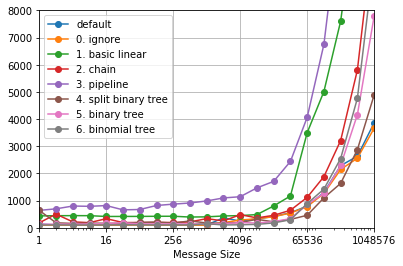

In [8]:
plot_osu(df_ompi3)
plt.ylim(0, 8000)

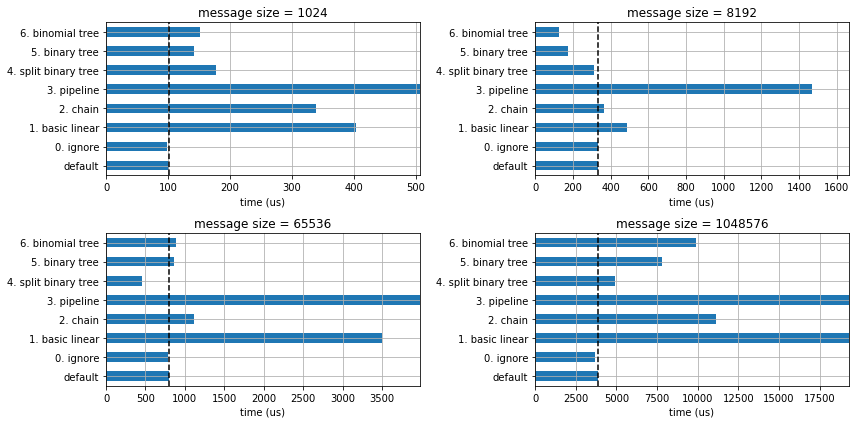

In [9]:
plot_barh(df_ompi3)

# OpenMPI4

In [10]:
ompi4_dir = TOP_DIR + 'openmpi4/'

ompi4_file_list = [ompi4_dir + 'bcast_default.log'] + [ompi4_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 10)]
ompi4_file_list

['./osu_log/bcast/N8n288/run3/openmpi4/bcast_default.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo0.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo1.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo2.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo3.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo4.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo5.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo6.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo7.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo8.log',
 './osu_log/bcast/N8n288/run3/openmpi4/bcast_algo9.log']

In [11]:
df_ompi4 = read_osu_log_multi(ompi4_file_list, ['default'] + bcast_algo_openmpi4)
df_ompi4[::4]

,default,0. ignore,1. basic linear,2. chain,3. pipeline,4. split binary tree,5. binary tree,6. binomial tree,7. knomial tree,8. scatter_allgather,9. scatter_allgather_ring
size,,,,,,,,,,,
1,92.02,96.06,402.30,324.14,595.69,615.35,133.86,90.37,56.48,411.02,394.13
16,93.57,101.78,403.56,173.02,805.57,156.48,169.26,98.69,57.92,413.30,398.17
256,125.19,109.65,408.98,176.62,627.63,182.42,367.62,106.37,59.40,418.22,405.76
4096,244.68,284.84,535.32,514.09,908.94,166.94,158.17,109.15,67.26,492.16,1918.99
65536,850.38,898.68,3419.30,678.33,2385.05,440.64,856.86,869.89,370.61,766.49,1913.79
1048576,3097.57,3206.38,21395.45,6243.72,22530.59,4871.56,7949.32,9320.87,2848.77,7697.35,9720.50


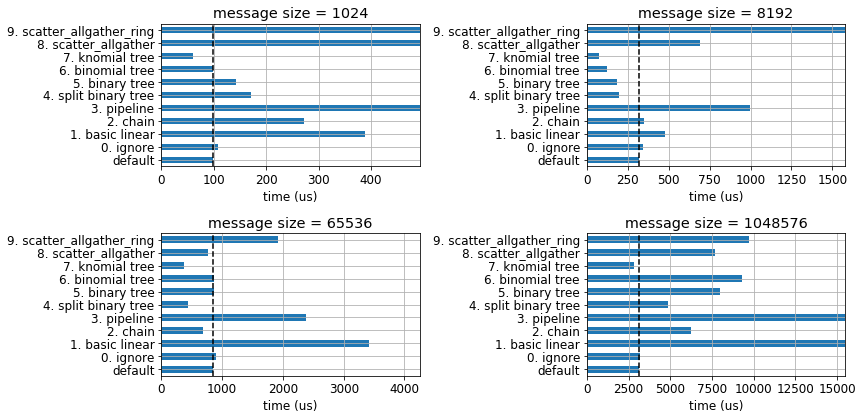

In [12]:
plt.rcParams['font.size'] = 12
plot_barh(df_ompi4)

## MPICH

In [13]:
mpich_dir = TOP_DIR + 'mpich3/'

In [14]:
df_mpich = read_osu_log_multi([mpich_dir + 'bcast_default.log'], columns=['default'])
df_mpich[::4]

,default
size,
1,44.27
16,42.86
256,46.06
4096,63.27
65536,1134.23
1048576,3930.72


## Intel MPI

In [15]:
impi_dir = TOP_DIR + '/intelmpi-tcp/'

impi_file_list = [impi_dir + 'bcast_default.log'] + [impi_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]
df_impi = read_osu_log_multi(impi_file_list, ['default'] + bcast_algo_intelmpi)
df_impi[::4]

,default,1. Binomial,2. Recursive doubling,3. Ring,4. Topology aware binomial,5. Topology aware recursive doubling,6. Topology aware ring,7. Shumilin's,8. Knomial,9. Topology aware SHM-based flat,10. Topology aware SHM-based Knomial,11. Topology aware SHM-based Knary,12. NUMA aware SHM-based (SSE4.2),13. NUMA aware SHM-based (AVX2),14. NUMA aware SHM-based (AVX512)
size,,,,,,,,,,,,,,,
1,36.45,72.04,72.54,1233.92,50.97,111.65,278.35,201.26,83.07,39.07,34.44,31.74,33.51,39.71,40.03
16,35.99,70.62,71.32,1228.78,50.28,184.13,350.57,189.87,82.17,35.54,31.03,31.00,31.32,37.62,37.67
256,36.21,246.90,252.18,1311.52,155.23,188.66,368.97,163.17,74.45,34.87,31.85,30.76,32.77,34.26,35.89
4096,126.55,291.52,293.97,1495.44,190.10,444.69,711.62,352.40,103.30,134.41,180.24,126.38,128.36,134.20,135.02
65536,383.22,604.80,1813.08,1782.58,428.63,585.79,888.16,938.20,729.89,412.32,389.52,360.83,383.66,384.22,390.58
1048576,2087.10,3835.12,21230.91,21451.15,3016.55,2274.54,2678.56,7115.48,10756.11,2054.14,2124.51,1992.55,1822.42,1914.49,2047.09


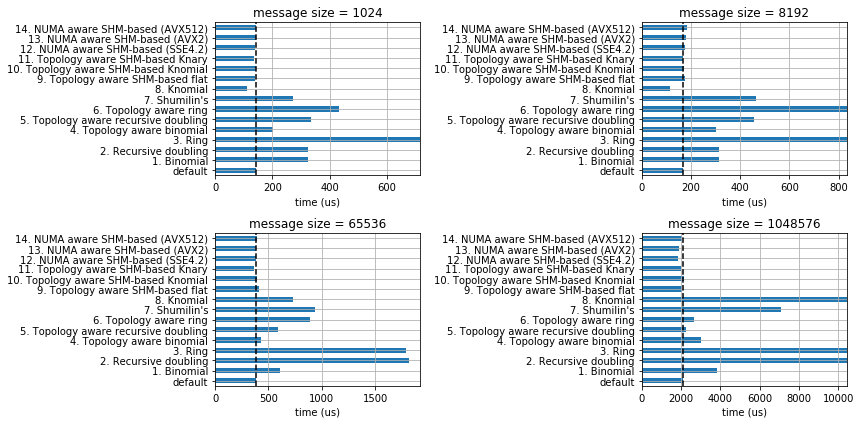

In [16]:
plt.rcParams['font.size'] = 10

plot_barh(df_impi)

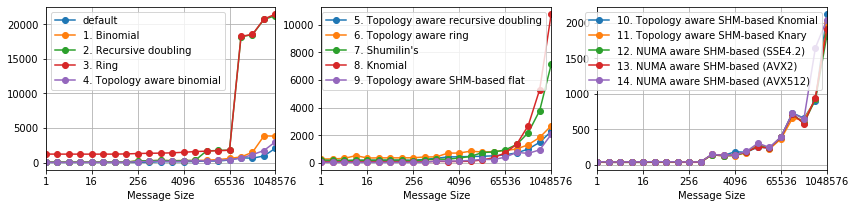

In [17]:
fig, axes = plt.subplots(1, 3, figsize=[14, 3])

plot_osu(df_impi.iloc[:, 0:5], ax=axes[0])
plot_osu(df_impi.iloc[:, 5:10], ax=axes[1])
plot_osu(df_impi.iloc[:, 10:], ax=axes[2])

## Intel MPI EFA

In [18]:
impi_efa_dir = TOP_DIR + '/intelmpi-efa/'

impi_efa_file_list = [impi_efa_dir + 'bcast_default.log'] + [impi_efa_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]

df_impi_efa = read_osu_log_multi(impi_efa_file_list, ['default'] + bcast_algo_intelmpi)
df_impi_efa[::4]

,default,1. Binomial,2. Recursive doubling,3. Ring,4. Topology aware binomial,5. Topology aware recursive doubling,6. Topology aware ring,7. Shumilin's,8. Knomial,9. Topology aware SHM-based flat,10. Topology aware SHM-based Knomial,11. Topology aware SHM-based Knary,12. NUMA aware SHM-based (SSE4.2),13. NUMA aware SHM-based (AVX2),14. NUMA aware SHM-based (AVX512)
size,,,,,,,,,,,,,,,
1,20.33,120.34,117.98,706.25,93.28,80.24,149.89,97.22,30.18,20.27,20.14,20.62,20.53,19.98,20.81
16,20.66,119.72,118.77,1053.32,78.95,173.93,315.34,87.20,29.60,20.63,20.42,20.43,20.54,19.87,20.57
256,20.87,121.13,119.46,7802.39,78.71,174.65,316.05,96.62,30.60,21.05,20.75,20.65,20.56,20.16,20.87
4096,59.67,137.55,135.67,8346.54,92.37,186.42,325.73,259.01,45.51,59.66,58.91,61.72,59.49,58.89,60.53
65536,128.36,466.25,8771.07,8896.18,348.48,448.22,507.72,915.16,305.08,130.59,127.92,129.57,117.67,117.22,119.89
1048576,1671.43,3311.74,9974.42,10109.23,2649.45,1925.49,2012.75,6445.87,2583.73,1667.08,1699.99,1699.82,1514.18,1507.12,1575.43


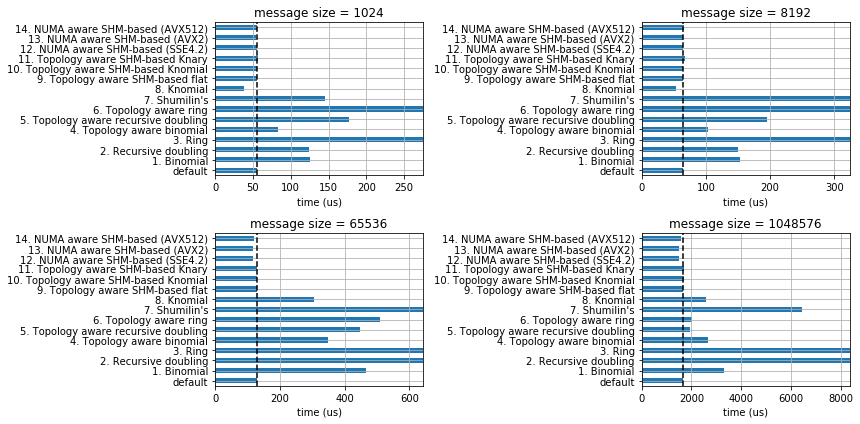

In [19]:
plot_barh(df_impi_efa)

# Put all together

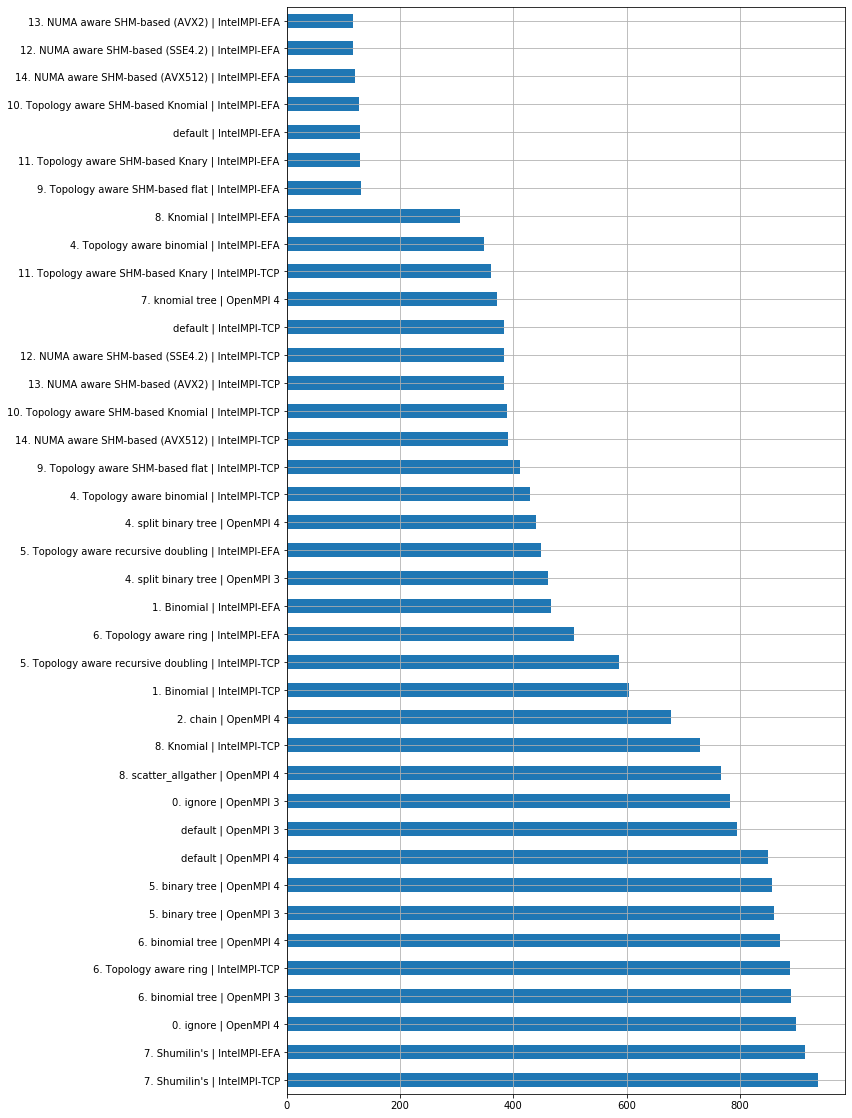

In [20]:
df_all = pd.concat(
    [df_ompi3.add_suffix(' | OpenMPI 3'), 
     df_ompi4.add_suffix(' | OpenMPI 4'), 
     df_mpich.add_suffix(' | MPICH 3'), 
     df_impi.add_suffix(' | IntelMPI-TCP'),
     df_impi_efa.add_suffix(' | IntelMPI-EFA')
    ], axis=1)

df_select = df_all.loc[65536]
df_select = df_select[df_select < df_select['default | OpenMPI 3']*1.2] # ignore cases that are too slower than default
df_select.sort_values(ascending=False).plot.barh(figsize=[10, 20], grid=True)

## Only select default cases

In [21]:
df_default = df_all.filter(like='default', axis=1)

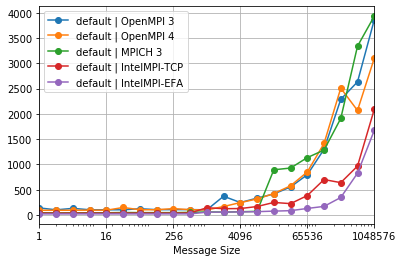

In [22]:
plot_osu(df_default)

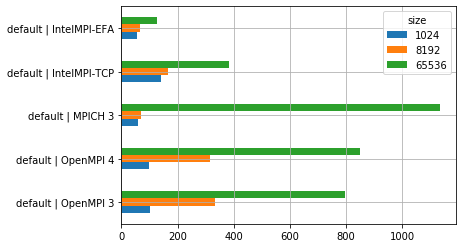

In [23]:
df_default.loc[[1024, 8192, 65536]].T.plot.barh(grid=True)

## Only select important cases

In [24]:
df_important = df_all.filter(regex=r'(default|knomial|Knomial|split)')
df_important.index.name='message size (Bytes)'

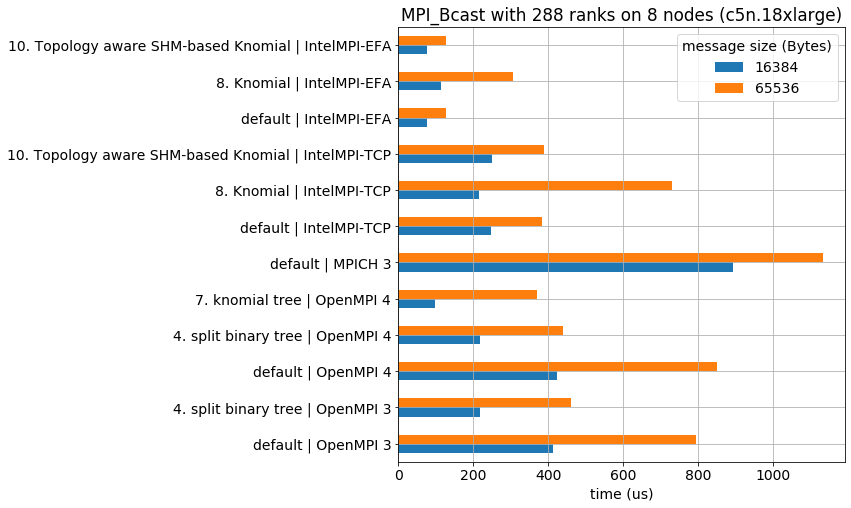

In [25]:
plt.rcParams['font.size'] = 14

df_important.loc[[16384, 65536]].T.plot.barh(grid=True, figsize=[8, 8])
plt.xlabel('time (us)')
plt.title('MPI_Bcast with 288 ranks on 8 nodes (c5n.18xlarge)')
plt.savefig('bcast_summary.png', dpi=144, bbox_inches='tight')

Text(0.5, 0, 'time (us)')

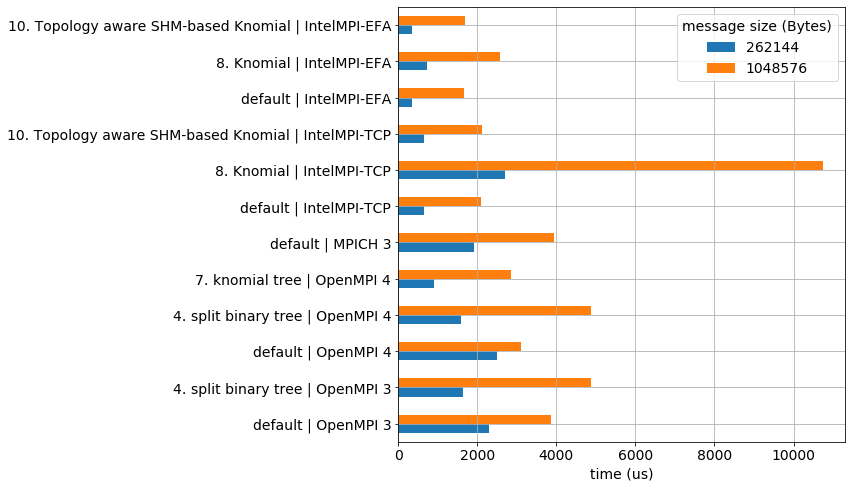

In [26]:
df_important.loc[[262144, 1048576]].T.plot.barh(grid=True, figsize=[8, 8])
plt.xlabel('time (us)')